<div align='center' style='font-family:"B Nazanin"'>
<h1> تکلیف اختیاری درس سیگنال ها و سیستم ها </h1>
<h2> سارا برادران - شماره دانشجویی : 9624193 </h2>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

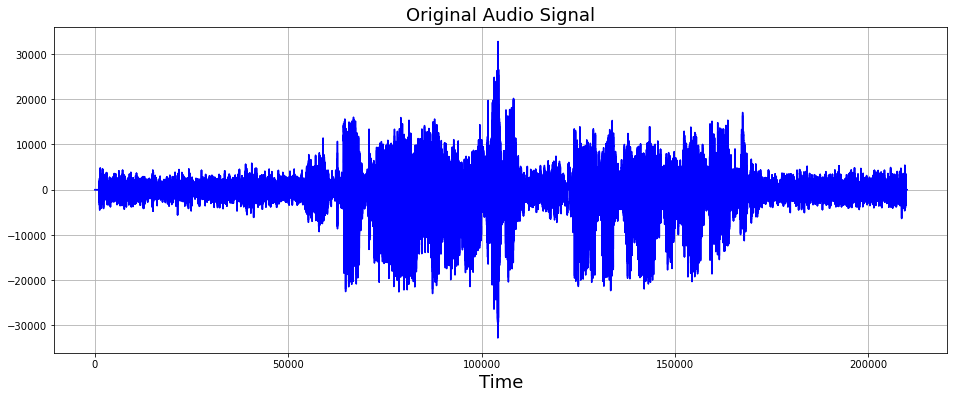

In [2]:
import matplotlib.pyplot as plt
from scipy.io.wavfile import write, read
from IPython.display import Audio
import numpy as np
import wave, sys

# reading the audio file
f_rate, my_signal = read('sample-voice.wav')

plt.figure(figsize=(16, 6))
plt.title("Original Audio Signal", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.plot(my_signal, color='b')
plt.grid(True, which='both')
plt.show()

In [3]:
Audio(my_signal[:, 0], rate=f_rate)

## Processing on Signal

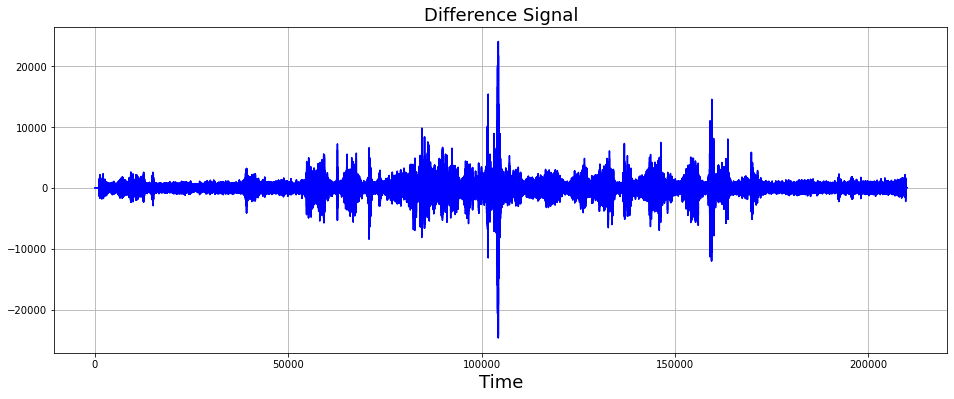

In [4]:
difference = np.zeros_like(my_signal)
for sample in range(1, len(my_signal)):
    difference[sample] = my_signal[sample] - my_signal[sample - 1]
    
plt.figure(figsize=(16, 6))
plt.title("Difference Signal", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.plot(difference, color='b')
plt.grid(True, which='both')
plt.show()

In [5]:
Audio(difference[:, 0], rate=f_rate)

In [6]:
samplerate = f_rate; fs = 100
write("difference.wav", samplerate, difference.astype(np.int16))

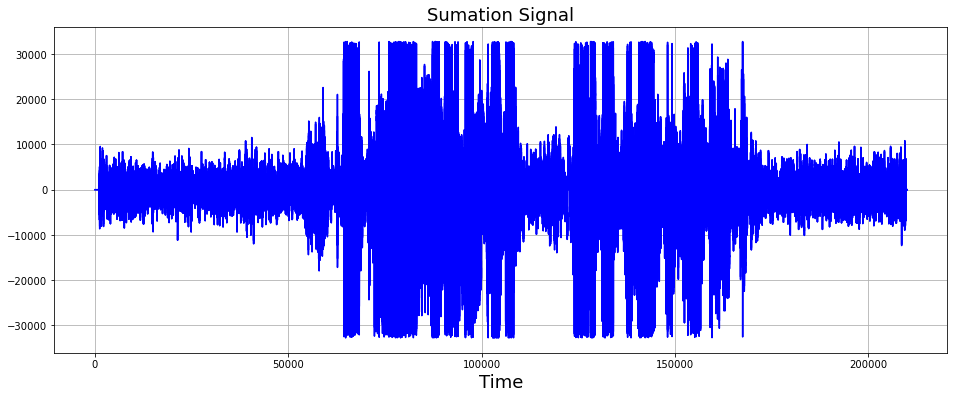

In [7]:
sumation = np.zeros_like(my_signal)
for sample in range(1, len(my_signal)):
    sumation[sample] = my_signal[sample] + my_signal[sample - 1]
    
plt.figure(figsize=(16, 6))
plt.title("Sumation Signal", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.plot(sumation, color='b')
plt.grid(True, which='both')
plt.show()

In [8]:
Audio(sumation[:, 0], rate=f_rate)

In [9]:
samplerate = f_rate; fs = 100
write("sumation.wav", samplerate, difference.astype(np.int16))

### Plotting Signal in Frequency Scope 

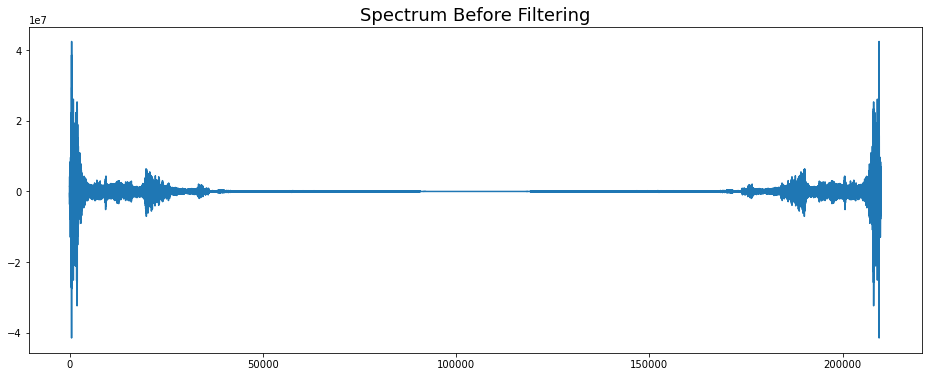

In [10]:
data_fft = np.fft.fft(my_signal[:, 0])
#freq = (np.abs(data_fft))
plt.figure(figsize=(16, 6))
plt.plot(data_fft)
plt.title("Spectrum Before Filtering", fontsize=18)
plt.show()

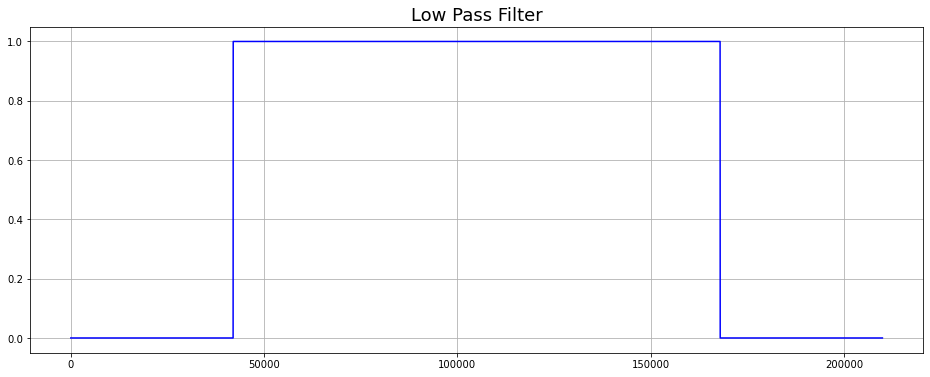

In [11]:
# creates a new low pass filter
LPF = np.zeros_like(data_fft)
LPF[round(0.2 * len(data_fft)): round(0.8 * len(data_fft))] = 1

plt.figure(figsize=(16, 6))
plt.title("Low Pass Filter", fontsize=18)
plt.plot(LPF, color='b')
plt.grid(True, which='both')
plt.show()

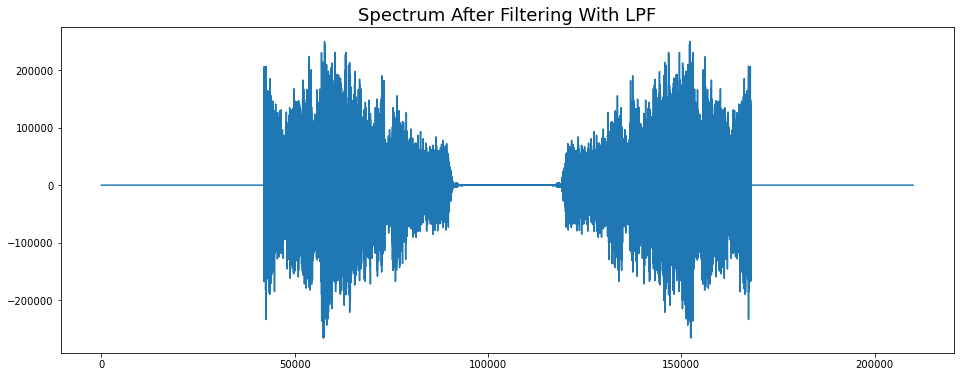

In [12]:
filtered = LPF * data_fft
#freq = (np.abs(filtered))
plt.figure(figsize=(16, 6))
plt.plot(filtered)
plt.title("Spectrum After Filtering With LPF", fontsize=18)
plt.show()

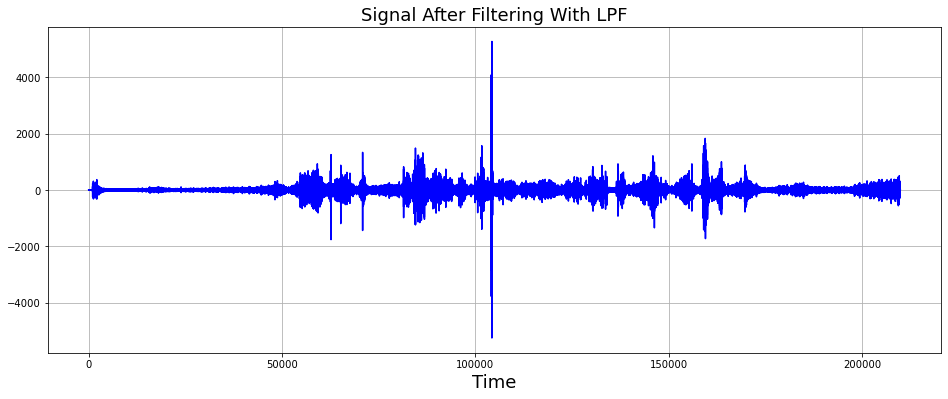

In [13]:
recovered_signal = np.fft.ifft(filtered)

plt.figure(figsize=(16, 6))
plt.title("Signal After Filtering With LPF", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.plot(recovered_signal, color='b')
plt.grid(True, which='both')
plt.show()

In [14]:
Audio(recovered_signal, rate=f_rate)

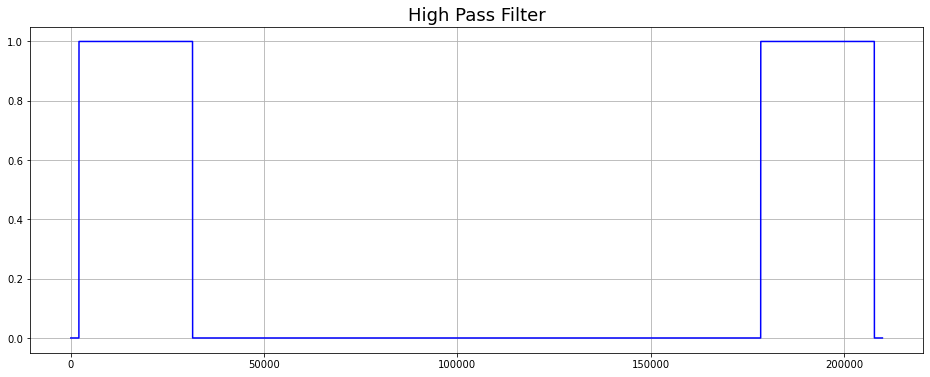

In [15]:
# creates a new high pass filter
HPF = np.zeros_like(data_fft)
HPF[round(0.01 * len(data_fft)): round(0.15 * len(data_fft))] = 1
HPF[round(0.85 * len(data_fft)): round(0.99 * len(data_fft))] = 1

plt.figure(figsize=(16, 6))
plt.title("High Pass Filter", fontsize=18)
plt.plot(HPF, color='b')
plt.grid(True, which='both')
plt.show()

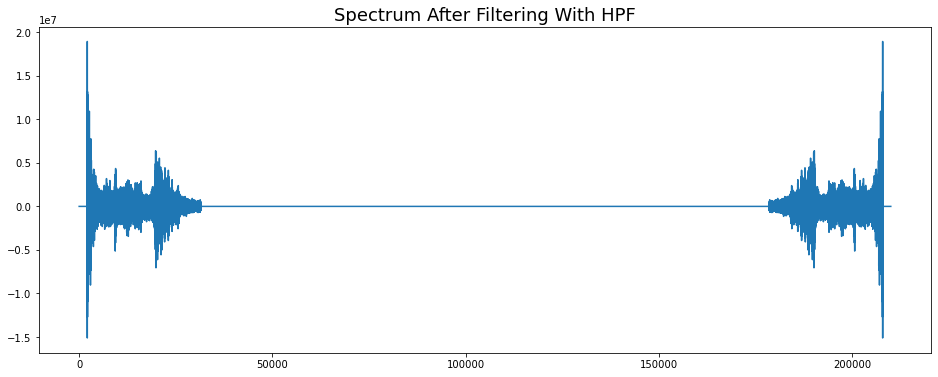

In [16]:
filtered = HPF * data_fft
#freq = (np.abs(filtered))
plt.figure(figsize=(16, 6))
plt.plot(filtered)
plt.title("Spectrum After Filtering With HPF", fontsize=18)
plt.show()

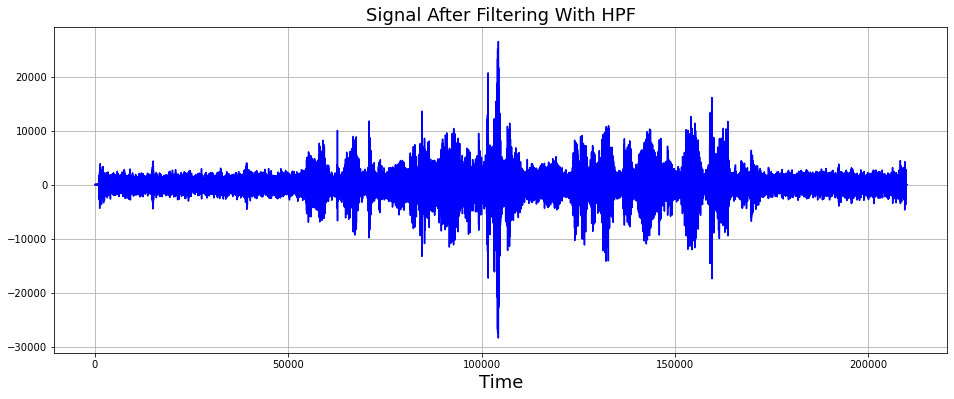

In [17]:
recovered_signal = np.fft.ifft(filtered)

plt.figure(figsize=(16, 6))
plt.title("Signal After Filtering With HPF", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.plot(recovered_signal, color='b')
plt.grid(True, which='both')
plt.show()

In [18]:
Audio(recovered_signal, rate=f_rate)